In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [116]:
r1=199/((10.292)*(10.235)) +95/((10.129)*(10.191))
r2=r1+94/((10.180)*(10.302))+200/((10.372)*(10.198))+197/((10.198)*(10.327))
r3=r2+194/((10.183)*(10.250))+203/((10.207)*(10.266))+95/((9.942)*(10.096))
r4=r3+114/((7.801)*(7.64))+112/((7.646)*(7.679))+59/((7.629)*(7.639))
r5=r4+58/((7.576)*(7.654))+58/((7.407)*(7.584))+57/((7.605)*(7.682))+58/((7.42)*(7.642))
r6=r5+59/((7.634)*(7.640))+58/((7.452)*(7.449))+59/((7.739)*(7.607))+60/((7.535)*(7.615))
r7=r6+1503/((9.877)*(9.751))
print(r1,r2,r3,r4,r5,r6,r7)


2.809468598910543 7.467192426596615 12.20961691069033 17.0423339879735 21.073585169588625 25.1779142972964 40.78366878999636


6.176959407204302 0.11218373367638662 0.42514385422022777
0.01661094645690819 0.0031536891923681877 0.008848784663808073


<Figure size 504x504 with 0 Axes>

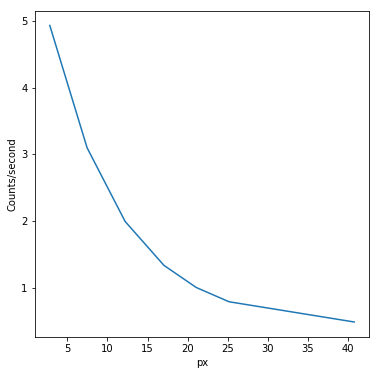

In [129]:

rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

sigma_I=((counts)**1/2/time)
def func(rho_x, a, b, c):
    return a * np.exp(-b * rho_x) + c

f = plt.figure(figsize=(7,7))
a0=4.8
b0=0.1
c0=0.387

popt,pcov = curve_fit(func,rho_x,I,p0=[a0,b0,c0],sigma=sigma_I)

params = curve_fit(func,rho_x,I,p0=[a0,b0,c0],sigma=sigma_I)
for j in range(len(popt)):
    da,db,dc=np.sqrt(pcov[j])


[a, b,c] = params[0]
f = plt.figure(figsize=(6,6))
plt.xlabel('px')
plt.ylabel('Counts/second')
plt.plot(rho_x,func(rho_x,a,b,c))
print(a,b,c)
print(da,db,dc)


In [130]:
def func(rho_x):
    return 6.176959407204302 * np.exp(-0.11218373367638662 * rho_x) +0.42514385422022777
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

sigma_I=((counts)**1/2/time)
expected=I
P=func(rho_x)
chisqr = sum(((expected-P)**2)/(sigma_I)**2)
reducedchisqr=chisqr/3
print(chisqr)
print(reducedchisqr)


0.0031070425414517202
0.0010356808471505734


In [127]:
def func(rho_x):
    return 6.191201533348978 * np.exp(-0.11375936714353549 * rho_x) +0.4383841515321539
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

sigma_I=((counts)**1/2/time)
expected=I
P=func(rho_x)
chisqr = sum(((expected-P)**2)/(sigma_I)**2)
reducedchisqr=chisqr/3
print(chisqr)
print(reducedchisqr)

0.005076285260897005
0.0016920950869656684


In [125]:
def func(rho_x):
    return 6.191201533348978 * np.exp(-(0.11375936714353549 * rho_x)) +0.4383841515321539
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
P=func(rho_x)
print(func(rho_x))


[4.93590268 3.08601731 1.98206679 1.32921924 1.00154582 0.79145222
 0.49820535]


In [101]:
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

print(I)

[4.93596059 3.08       2.01609658 1.32189974 1.02456499 0.78203125
 0.48972603]


In [107]:
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

sigma_I=((counts)**1/2/time)
print(sigma_I)

[2.4679803  1.54       1.00804829 0.66094987 0.5122825  0.39101562
 0.24486301]


In [ ]:
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])

[0.214, 0.149, 0.102, 0.0682, 0.0549]


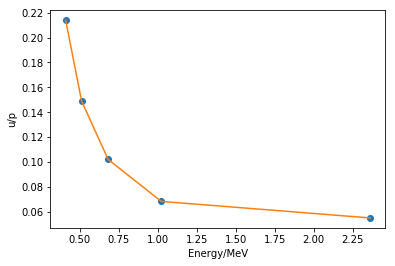

In [139]:
xp=[0.4086,0.5108,0.6811,1.022,2.362]
fp=[0.214,0.149,0.102,0.0682,0.0549]
np.interp(0.662,xp,fp)
plt.xlabel('Energy/MeV')
plt.ylabel('u/p')
plt.figsize=(6,6)
plt.plot(x,y,'o')
plt.plot(xp,fp)
print(y)
